In [38]:
import pandas as pd 
import numpy as np 
import csv  
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import datetime
%matplotlib inline

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [3]:
#crashes_data = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
# crashes_data.drop(crashes_data.columns[np.r_[1,2,5,10:13,15,17:20,21,24:35,36:43,48]], axis=1, inplace=True)

In [4]:
# people_data = pd.read_csv('data/Traffic_Crashes_-_People.csv', low_memory=False)
# people_data.drop(people_data.columns[np.r_[3:10,11,12,13,17:30]], axis=1, inplace=True)

In [5]:
# vehicles_data = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv', low_memory=False)
# vehicles_data.drop(vehicles_data.columns[np.r_[0,2:13,16,18:38,39:72]], axis=1, inplace=True)

In [6]:
# people_crashes_data = crashes_data.merge(people_data, on='CRASH_RECORD_ID')
# df = people_crashes_data.merge(vehicles_data, on='CRASH_RECORD_ID')

In [7]:
# df= df[df["CRASH_DATE"].isin(pd.date_range("2019-01-01", "2020-01-01"))]

In [8]:
# import datetime as datetime
# df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.datetime.strptime(x[0:10], "%m/%d/%Y"))
# df['CRASH_DATE']

In [40]:
df = pd.read_csv("Data/merged_df.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558254 entries, 0 to 558253
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               558254 non-null  int64  
 1   CRASH_RECORD_ID          558254 non-null  object 
 2   CRASH_DATE               558254 non-null  object 
 3   POSTED_SPEED_LIMIT       558254 non-null  int64  
 4   DEVICE_CONDITION         558254 non-null  object 
 5   WEATHER_CONDITION        558254 non-null  object 
 6   LIGHTING_CONDITION       558254 non-null  object 
 7   FIRST_CRASH_TYPE         558254 non-null  object 
 8   ROADWAY_SURFACE_COND     558254 non-null  object 
 9   ROAD_DEFECT              558254 non-null  object 
 10  CRASH_TYPE               558254 non-null  object 
 11  DAMAGE                   558254 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE  558254 non-null  object 
 13  SEC_CONTRIBUTORY_CAUSE   558254 non-null  object 
 14  MOST

In [41]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 'low risk', 
                                                                         'REPORTED, NOT EVIDENT': 'low risk',
                                                                         'NONINCAPACITATING INJURY': 'medium risk',
                                                                         'INCAPACITATING INJURY': 'high risk',
                                                                         'FATAL': 'high risk'})


In [42]:
df['MOST_SEVERE_INJURY'].value_counts()

low risk       483978
medium risk     59584
high risk       14692
Name: MOST_SEVERE_INJURY, dtype: int64

In [43]:
low_risk_percentage = (483978/(483978+59584+14692))*100
print(low_risk_percentage)

86.69494531163234


In [44]:
med_risk_percentage = (59584/(483978+59584+14692))*100
print(med_risk_percentage)

10.67327775528702


In [45]:
high_risk_percentage = (14692/(483978+59584+14692))*100
print(high_risk_percentage)

2.6317769330806406


In [46]:
df.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

In [47]:
df.duplicated().sum()

0

In [48]:
#df.drop_duplicates(inplace=True)

In [19]:
df.shape

(558254, 31)

# Split the data

In [49]:
X = df.drop(["MOST_SEVERE_INJURY","CRASH_RECORD_ID", "CRASH_DATE"], axis=1)
y = df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42)

In [50]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [51]:
X_train['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True )
X_train['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True )

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
X_train['SEX'].fillna('X', inplace=True)

X_train['SEX'] = X_train['SEX'].map({'M': 'M', 
                           'F': 'F',
                           'X': 'Unknown'})
X_train['SEX'].value_counts()

<ipython-input-52-6614c1745b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SEX'] = X_train['SEX'].map({'M': 'M',


M          203352
F          150158
Unknown     37267
Name: SEX, dtype: int64

In [53]:
X_train['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
X_train['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
X_train['EJECTION'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_DEFECT'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_TYPE'].fillna('UNKNOWN/NA', inplace=True)
X_train['VEHICLE_USE'].fillna('UNKNOWN/NA', inplace=True)
X_train['MANEUVER'].fillna('UNKNOWN/NA', inplace=True)
X_train['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)

In [54]:
X_train.isnull().sum()

Unnamed: 0                 0
POSTED_SPEED_LIMIT         0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
PERSON_ID                  0
PERSON_TYPE                0
SEX                        0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
MANEUVER                   0
FIRST_CONTACT_POINT        0
dtype: int64

# dummy_model

In [62]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)[:50]
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.86690721, 0.86690721, 0.8669183 , 0.8669183 , 0.8669183 ])

# Logistic Model-baseline

In [67]:
X_train_baseline = X_train.select_dtypes(include=['int64','float64'])
X_test_baseline = X_test.select_dtypes(include=['int64','float64'])

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000)
model.fit(X_train_baseline,y_train)
y_hat = model.predict(X_train_baseline)

acc = accuracy_score(y_train,y_hat)
acc

0.8669138664762768

In [69]:
precision_score(y_train, y_hat, average='macro')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2889712888254256

In [70]:
precision_score(y_train, y_hat, average='micro')

0.8669138664762768

In [71]:
precision_score(y_train, y_hat, average='weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7515396518888477

In [89]:
recall_score(y_train, y_hat, average='macro')

0.3333333333333333

In [90]:
recall_score(y_train, y_hat, average='micro')

0.8669138664762768

In [91]:
recall_score(y_train, y_hat, average='weighted')

0.8669138664762768

In [36]:
confusion_matrix(y_train, y_hat)

array([[     0,  10264,      0],
       [     0, 338770,      0],
       [     0,  41743,      0]])

In [86]:
categoricals = ['POSTED_SPEED_LIMIT', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION']

train_dummies = X_train[categoricals]
#test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
# Transform the dataset into dummies matrix

enc = ohe.fit(train_dummies)
train_dummies_trans = enc.transform(train_dummies)
#test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
#test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
#test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

In [ ]:
from sklearn import *
logreg_model_dummy = LogisticRegression(random_state=2021, penalty='none',max_iter=10000)
logreg_model_dummy.fit(train_dummies_trans_df, y_train)
y_hat_dummy = model.predict(train_dummies_trans_df)
y_hat_dummy
# acc = accuracy_score(y_train,train_dummies_trans_df)
# acc

# Decision Tree

In [81]:
tree_clf = DecisionTreeClassifier(max_depth=2) 

tree_clf.fit(train_dummies_trans_df, y_train)

y_pred_dt = tree_clf.predict(train_dummies_trans_df)
y_pred_dt

array(['low risk', 'low risk', 'low risk', ..., 'low risk', 'low risk',
       'low risk'], dtype=object)

In [82]:
acc = accuracy_score(y_train,y_pred_dt) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 86.69138664762768


In [83]:
precision_score(y_train, y_pred_dt, average='macro')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2889712888254256

In [84]:
precision_score(y_train, y_pred_dt, average='micro')

0.8669138664762768

In [85]:
precision_score(y_train, y_pred_dt, average='weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7515396518888477

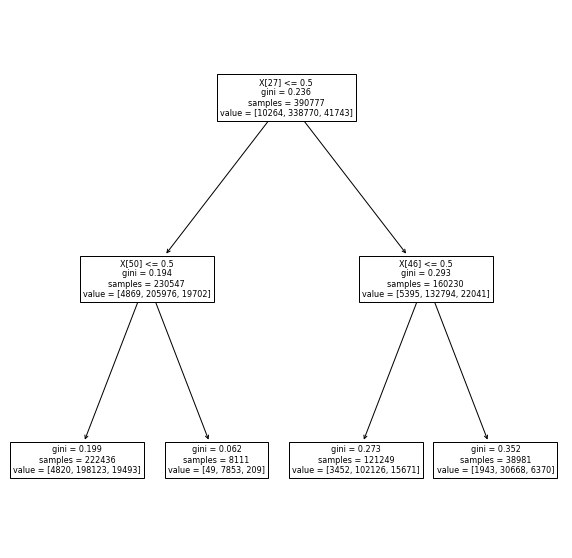

In [35]:
f,ax = plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);